<a href="https://colab.research.google.com/github/jahidurmahim/Machine_Learning_Laboratory/blob/main/USA_Election_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing necessary libraries
This cell imports essential Python libraries for data manipulation, visualization, and numerical operations:
- `numpy` (as `np`): For numerical operations.
- `matplotlib.pyplot` (as `plt`): For creating static, interactive, and animated visualizations.
- `pandas` (as `pd`): For data manipulation and analysis.
- `seaborn` (as `sns`): For statistical data visualization based on Matplotlib.

In [325]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from collections import Counter

### Loading the dataset
This cell loads the dataset from an Excel file into a pandas DataFrame named `df`.
- The file path is `/content/drive/MyDrive/2016 Election and 2010 Religion by County.xlsx`.

In [326]:
df=pd.read_excel('/content/drive/MyDrive/2016 Election and 2010 Religion by County.xlsx')

### Displaying DataFrame information
This cell prints a concise summary of the DataFrame `df`.
- It includes the data types of each column, non-null values, and memory usage.

In [327]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 91 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   State Code                                        3113 non-null   object 
 1   County Name                                       3113 non-null   object 
 2   County Population                                 3112 non-null   float64
 3   Clinton or Trump State                            3113 non-null   object 
 4   Clinton                                           3113 non-null   int64  
 5   Trump                                             3113 non-null   int64  
 6   Total                                             3113 non-null   int64  
 7   % Clinton                                         3113 non-null   float64
 8   % Trump                                           3113 non-null   float64
 9   Vote Difference C-T

### Displaying DataFrame shape
This cell prints the dimensions of the DataFrame `df`.
- It shows the number of rows and columns (e.g., `[rows, columns]`).

In [328]:
df.shape

(3113, 91)

### Displaying the first 15 rows of the DataFrame
This cell shows the top 15 rows of the DataFrame `df`.
- Useful for quickly inspecting the data content and structure.

In [370]:
df.head(15)

,StateCode,CountyName,CountyPop,CTState,PctClinton,VoteDiffCT,ClintonBWObama,TrumpBWRomney,PctClintonBWObama,LandArea2010,...,BahaiAdhPerK,TotalBuddAdh,TotalBuddAdhPerK,LDSAdh,LDSAdhPerK,TotalHinduAdh,TotalHinduAdhPerK,TotalJudaismAdh,TotalJudaismAdhPerK,CTState_Numeric
0,AL,Autauga County,0.120091,Trump,-0.510646,-1.421323,0.237741,-0.035137,0.842874,-0.326134,...,0.758913,0.0,0.0,0.350315,0.236399,0.0,0.0,0.0,0.0,1
1,AL,Baldwin County,2.041425,Trump,-0.807066,-2.014214,0.733913,2.029036,0.967850,1.994418,...,-0.523899,0.0,0.0,0.806626,-0.977917,0.0,0.0,0.0,0.0,1
2,AL,Barbour County,-0.441412,Trump,1.021785,0.547186,-0.308426,-0.699917,0.443627,0.351003,...,-0.716321,0.0,0.0,-0.903412,-0.457066,0.0,0.0,0.0,0.0,1
3,AL,Bibb County,-0.517413,Trump,-0.681741,-0.177261,0.350936,-0.145933,0.402250,-0.260528,...,-0.748391,0.0,0.0,-0.429029,-0.733105,0.0,0.0,0.0,0.0,1
4,AL,Blount County,0.165349,Trump,-1.555983,-2.014214,-0.106561,0.997144,0.588130,-0.208770,...,-1.104728,0.0,0.0,-0.844679,-1.046246,0.0,0.0,0.0,0.0,1
5,AL,Bullock County,-0.748704,Trump,2.540265,1.051046,0.160391,-0.702257,1.126646,-0.259992,...,2.218112,0.0,0.0,-0.429029,-0.733105,0.0,0.0,0.0,0.0,1
6,AL,Butler County,-0.564675,Trump,0.760309,0.446889,0.044366,-0.763898,0.712261,0.099093,...,-0.716321,0.0,0.0,-1.271623,-1.073320,0.0,0.0,0.0,0.0,1
7,AL,Calhoun County,1.292849,Trump,-0.247471,-2.014214,-1.513954,1.359184,0.226545,-0.299486,...,-0.620110,0.0,0.0,1.093515,-0.452052,0.0,0.0,0.0,0.0,1
8,AL,Chambers County,-0.292874,Trump,0.695588,0.300339,-0.369740,-0.454135,0.313875,-0.321261,...,-0.976447,0.0,0.0,-0.966663,-0.807881,0.0,0.0,0.0,0.0,1
9,AL,Cherokee County,-0.453670,Trump,-1.148279,-0.588277,0.090587,0.410390,-0.098321,-0.421116,...,-0.716321,0.0,0.0,-0.429029,-0.733105,0.0,0.0,0.0,0.0,1


### Checking for duplicate rows
This cell calculates and displays the total number of duplicate rows in the DataFrame `df`.
- `df.duplicated().sum()` returns the count of rows that are identical to a previous row.

In [329]:
df.duplicated().sum()

np.int64(0)

### Calculating percentage of missing values per column
This cell computes the proportion of missing values for each column in the DataFrame `df`.
- `df.isna().sum()` counts `NaN` values per column.
- Dividing by `len(df)` gives the percentage of missing data.

In [330]:
# check the percentage
df.isna().sum() / len(df)

,0
State Code,0.000000
County Name,0.000000
County Population,0.000321
Clinton or Trump State,0.000000
Clinton,0.000000
...,...
Total Judaism Adherents per Thousand,0.000321
Unitarian Universalist Adherents,0.806617
Unitarian Universalist Adherents per Thousand,0.806617
Zoroastrian Adherents,0.905557


### Visualizing missing data with a heatmap
This cell generates a heatmap to visually represent the presence of missing values across the DataFrame `df`.
- `seaborn.heatmap()` is used to plot the `isna()` (missing values) status of transposed DataFrame (`.transpose()`).
- `cmap="YlGnBu"` sets the color scheme.
- `cbar_kws` adds a color bar label.

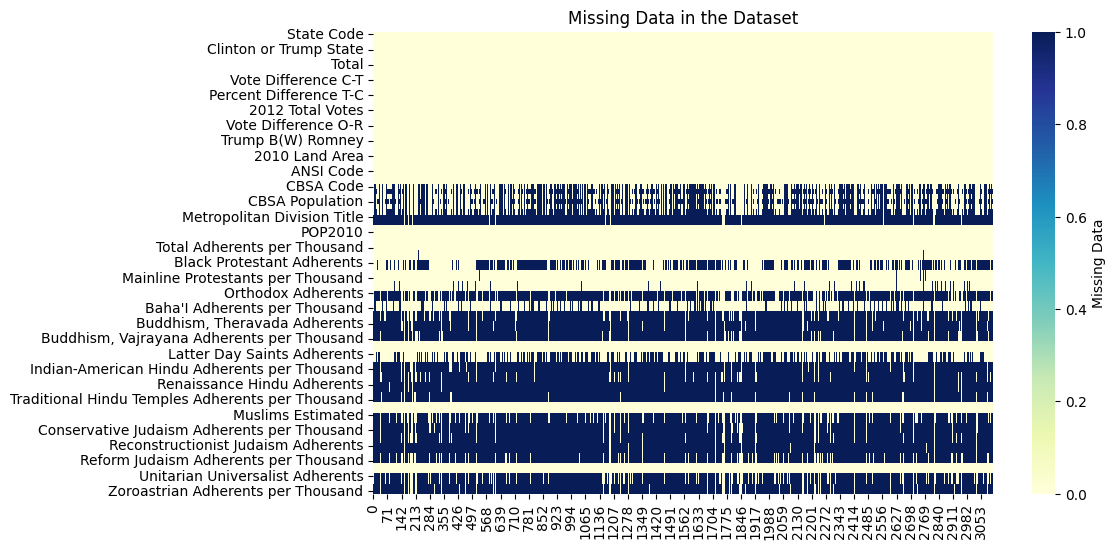

In [331]:
# Visualizing Missing Data using a seaborn heatmap.
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(), cmap="YlGnBu", cbar_kws={'label': 'Missing Data'})
plt.title('Missing Data in the Dataset')
plt.show()

### Dropping columns with 60% or more missing values
This cell identifies and removes columns from `df` that have a high percentage (60% or more) of missing values.
- It first calculates missing value percentages.
- Then, it filters for columns exceeding the 60% threshold.
- Finally, it drops these columns and prints the DataFrame's shape before and after the operation.

In [332]:
# Calculate the percentage of missing values for each column again
missing_percentages_60 = df.isna().sum() / len(df)

# Identify columns with 60% or more missing values (and less than 80%, as those were already dropped)
columns_to_drop_60 = missing_percentages_60[missing_percentages_60 >= 0.6].index.tolist()

print(f"Columns to drop (60% or more missing values): {columns_to_drop_60}")
print(f"Original DataFrame shape: {df.shape}")

# Drop the identified columns
df = df.drop(columns=columns_to_drop_60)

print(f"New DataFrame shape after dropping more columns: {df.shape}")

Columns to drop (60% or more missing values): ['CSA Code', 'CBSA Population', 'CSA Title', 'Metropolitan Division Title', 'Metropolitan Division Code', 'Orthodox Adherents', 'Orthodox Adherents per Thousand', 'Buddhism, Mahayana Adherents', 'Buddhism, Mahayana Adherents per Thousand', 'Buddhism, Theravada Adherents', 'Buddhism, Theravada Adherents per Thousand', 'Buddhism, Vajrayana Adherents', 'Buddhism, Vajrayana Adherents per Thousand', 'Indian-American Hindu Adherents', 'Indian-American Hindu Adherents per Thousand', 'Post Renaissance Hindu Adherents', 'Post Renaissance Hindu Adherents per Thousand', 'Renaissance Hindu Adherents', 'Renaissance Hindu Adherents per Thousand', 'Traditional Hindu Temples Adherents', 'Traditional Hindu Temples Adherents per Thousand', 'Muslims Estimated', 'Muslims Estimated per Thousand', 'Conservative Judaism Adherents', 'Conservative Judaism Adherents per Thousand', 'Orthodox Judaism Adherents', 'Orthodox Judaism Adherents per Thousand', 'Reconstructi

### Displaying missing values percentage after column drops
This cell recalculates and displays the percentage of missing values for each column after the previous step of dropping highly incomplete columns.
- It serves as a verification that the columns with high missing percentages have been removed.

In [333]:
# Display missing values percentage after dropping more columns
df.isna().sum() / len(df)

,0
State Code,0.000000
County Name,0.000000
County Population,0.000321
Clinton or Trump State,0.000000
Clinton,0.000000
Trump,0.000000
Total,0.000000
% Clinton,0.000000
% Trump,0.000000
Vote Difference C-T,0.000000


### Defining a data imputation function
This cell defines a Python function `data_imputation` to fill missing values.
- It takes a DataFrame, a grouping column, and a target column with missing values.
- It imputes `NaN` values in `column_selected` with the median value calculated within each `column_grouping` category.
- This helps maintain local data distribution for imputation.

In [334]:
# function to fill in missing values using median
def data_imputation(data, column_grouping, column_selected):
    # Parameter meaning
    # data => The name of the dataframe to be processed
    # column_grouping => The column used to group values and take the median
    # column_selected => The column in which we will fill its NaN values

    # Get unique category groups
    group = data[column_grouping].unique()

    # Loop through each value in the group category
    for value in group:
        # get median
        median = data.loc[(data[column_grouping]==value) & ~(data[column_selected].isna()), column_selected].median()

        # change missing value
        data.loc[(data[column_grouping]==value) & (data[column_selected].isna()), column_selected] = median

    # Return the dataframe after filling the missing values
    return data

Applying `data_imputation` to `County Population` using `State Code` for grouping.

In [335]:
df = data_imputation(df, 'State Code', 'County Population')
print(f"Missing values in 'County Population' after imputation: {df['County Population'].isna().sum()}")

Missing values in 'County Population' after imputation: 0


### Imputing remaining numerical columns using grouped median
This cell iterates through all numerical columns that still have missing values (excluding 'County Population', which was just imputed).
- For each identified column, it applies the `data_imputation` function, grouping by 'State Code' and filling `NaN`s with the median specific to each state.
- This ensures that missing numerical data is handled by considering state-level characteristics.

In [336]:
# Identify numerical columns with missing values
missing_numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns[df.select_dtypes(include=['float64', 'int64']).isna().any()].tolist()

print("Imputing numerical columns using median grouped by 'State Code':")
for col in missing_numerical_cols:
    if col != 'County Population': # County Population already imputed
        df = data_imputation(df, 'State Code', col)
        print(f"  - '{col}': Missing values after imputation: {df[col].isna().sum()}")


Imputing numerical columns using median grouped by 'State Code':
  - 'State FIPS Code': Missing values after imputation: 1
  - 'County FIPS Code': Missing values after imputation: 1
  - 'CBSA Code': Missing values after imputation: 1
  - 'POP2010': Missing values after imputation: 1
  - 'Total Congregations': Missing values after imputation: 1
  - 'Total Adherents': Missing values after imputation: 1
  - 'Total Adherents per Thousand': Missing values after imputation: 1
  - 'Evangelical Protestant Adherents': Missing values after imputation: 1
  - 'Evangelical Protestants Per Thousand': Missing values after imputation: 1
  - 'Black Protestant Adherents': Missing values after imputation: 68
  - 'Black Protestants per Thousand': Missing values after imputation: 68
  - 'Mainline Protestant  Adherents': Missing values after imputation: 1
  - 'Mainline Protestants per Thousand': Missing values after imputation: 1
  - 'Catholic Adherents': Missing values after imputation: 1
  - 'Catholic Adh

### Final imputation for remaining categorical missing values
This cell addresses any remaining missing values in categorical columns.
- It identifies all object-type columns with `NaN`s.
- For each such column, it imputes missing values with the global mode (most frequent value) of that column.
- This ensures all categorical `NaN`s are handled.

In [338]:
# Identify categorical columns that still have missing values
remaining_missing_categorical_cols = df.select_dtypes(include=['object']).columns[df.select_dtypes(include=['object']).isna().any()].tolist()

if remaining_missing_categorical_cols:
    print("\nApplying final imputation for remaining categorical columns using global mode:")
    for col in remaining_missing_categorical_cols:
        mode_val = df[col].mode()[0]
        df[col] = df[col].fillna(mode_val)
        print(f"  - '{col}': Missing values after global mode imputation: {df[col].isna().sum()}")
else:
    print("\nNo categorical columns with remaining missing values found.")


Applying final imputation for remaining categorical columns using global mode:
  - 'CBSA Title': Missing values after global mode imputation: 0
  - 'Metropolitan/Micropolitan Statistical Area': Missing values after global mode imputation: 0


### Final verification of missing values
This cell performs a final check to confirm that all missing values throughout the entire DataFrame have been successfully handled.
- It sums all `NaN`s across the DataFrame.
- Prints a message indicating whether the dataset is clean or if any missing values still exist.

In [339]:
# Final verification that all missing values have been filled
total_missing_final = df.isna().sum().sum()
print(f"\nTotal missing values in the DataFrame after final imputation: {total_missing_final}")

if total_missing_final == 0:
    print("All missing values have been successfully filled! The dataset is now clean.")
else:
    print("There are still some missing values after the final imputation. Please review.")


Total missing values in the DataFrame after final imputation: 0
All missing values have been successfully filled! The dataset is now clean.


### Dropping specified columns
This cell explicitly drops two specific columns, 'Black Protestant Adherents' and 'Black Protestants per Thousand', from the DataFrame `df`.
- It prints the DataFrame's shape before and after the removal to show the impact.

In [340]:
columns_to_drop_final = ['Black Protestant Adherents', 'Black Protestants per Thousand']

print(f"Original DataFrame shape: {df.shape}")
df = df.drop(columns=columns_to_drop_final)
print(f"New DataFrame shape after dropping: {df.shape}")

Original DataFrame shape: (3113, 56)
New DataFrame shape after dropping: (3113, 54)


### Renaming columns for consistency and clarity
This cell renames multiple columns in the DataFrame `df` to shorter, more consistent, and easier-to-use names.
- A dictionary `new_column_names` maps old names to new names.
- `df.rename(columns=new_column_names)` applies the changes.
- It then verifies that no missing values exist after renaming and displays a report.

In [341]:
new_column_names = {
    'State Code': 'StateCode',
    'County Name': 'CountyName',
    'County Population': 'CountyPop',
    'Clinton or Trump State': 'CTState',
    'Clinton': 'ClintonVotes',
    'Trump': 'TrumpVotes',
    'Total': 'TotalVotes',
    '% Clinton': 'PctClinton',
    '% Trump': 'PctTrump',
    'Vote Difference C-T': 'VoteDiffCT',
    'Vote Difference T-C': 'VoteDiffTC',
    'Percent Difference C-T': 'PctDiffCT',
    'Percent Difference T-C': 'PctDiffTC',
    'Obama': 'ObamaVotes',
    'Romney': 'RomneyVotes',
    '2012 Total Votes': 'TotalVotes2012',
    '% Obama': 'PctObama',
    '% Romney': 'PctRomney',
    'Vote Difference O-R': 'VoteDiffOR',
    '% Difference O-R': 'PctDiffOR',
    'Clinton B(W) Obama': 'ClintonBWObama',
    'Trump B(W) Romney': 'TrumpBWRomney',
    'Clinton % B(W) Obama': 'PctClintonBWObama',
    'Trump % B(W) Romney': 'PctTrumpBWRomney',
    '2010 Land Area': 'LandArea2010',
    'Density': 'Density',
    'Combined FIPS Code': 'FIPSCodeComb',
    'ANSI Code': 'ANSICode',
    'State FIPS Code': 'StateFIPS',
    'County FIPS Code': 'CountyFIPS',
    'CBSA Code': 'CBSACode',
    'CBSA Title': 'CBSATitle',
    'Metropolitan/Micropolitan Statistical Area': 'MetroArea',
    'Central/Outlying County': 'CentralOutlying',
    'POP2010': 'Population2010',
    'Total Congregations': 'TotalCongregations',
    'Total Adherents': 'TotalAdherents',
    'Total Adherents per Thousand': 'TotalAdhPerK',
    'Evangelical Protestant Adherents': 'EvangProtAdh',
    'Evangelical Protestants Per Thousand': 'EvangProtPerK',
    'Mainline Protestant  Adherents': 'MainProtAdh',
    'Mainline Protestants per Thousand': 'MainProtPerK',
    'Catholic Adherents': 'CatholicAdh',
    'Catholic Adherents per Thousand': 'CatholicAdhPerK',
    "Baha'I Adherents": 'BahaiAdh',
    "Baha'I Adherents per Thousand": 'BahaiAdhPerK',
    'Total Buddhist Adherents': 'TotalBuddAdh',
    'Total Buddhist Adherents  per Thousand': 'TotalBuddAdhPerK',
    'Latter Day Saints Adherents': 'LDSAdh',
    'Latter Day Saints Adherents per Thousand': 'LDSAdhPerK',
    'Total Hindu Adherents': 'TotalHinduAdh',
    'Total Hindus Adherents per Thousand': 'TotalHinduAdhPerK',
    'Total Judaism Adherents': 'TotalJudaismAdh',
    'Total Judaism Adherents per Thousand': 'TotalJudaismAdhPerK'
}

df = df.rename(columns=new_column_names)

# Verify no missing values and display in the requested format
missing_values_report = pd.DataFrame({
    'Column Name': df.columns,
    'Missing Values': df.isna().sum().values
})

display(missing_values_report)

,Column Name,Missing Values
0,StateCode,0
1,CountyName,0
2,CountyPop,0
3,CTState,0
4,ClintonVotes,0
5,TrumpVotes,0
6,TotalVotes,0
7,PctClinton,0
8,PctTrump,0
9,VoteDiffCT,0


### Visualizing outliers for top columns (before capping)
This cell generates box plots for the top 5 columns identified as having the most outliers.
- It sorts `outlier_df` to find these columns.
- Uses `seaborn.boxplot()` to visualize the distribution and outliers for each of these columns.
- This helps in understanding the extent of outlier presence in the most affected features.

Top 5 columns with the most outliers for visualization: ['VoteDiffOR', 'TotalJudaismAdhPerK', 'TotalJudaismAdh', 'TotalBuddAdhPerK', 'TotalBuddAdh']


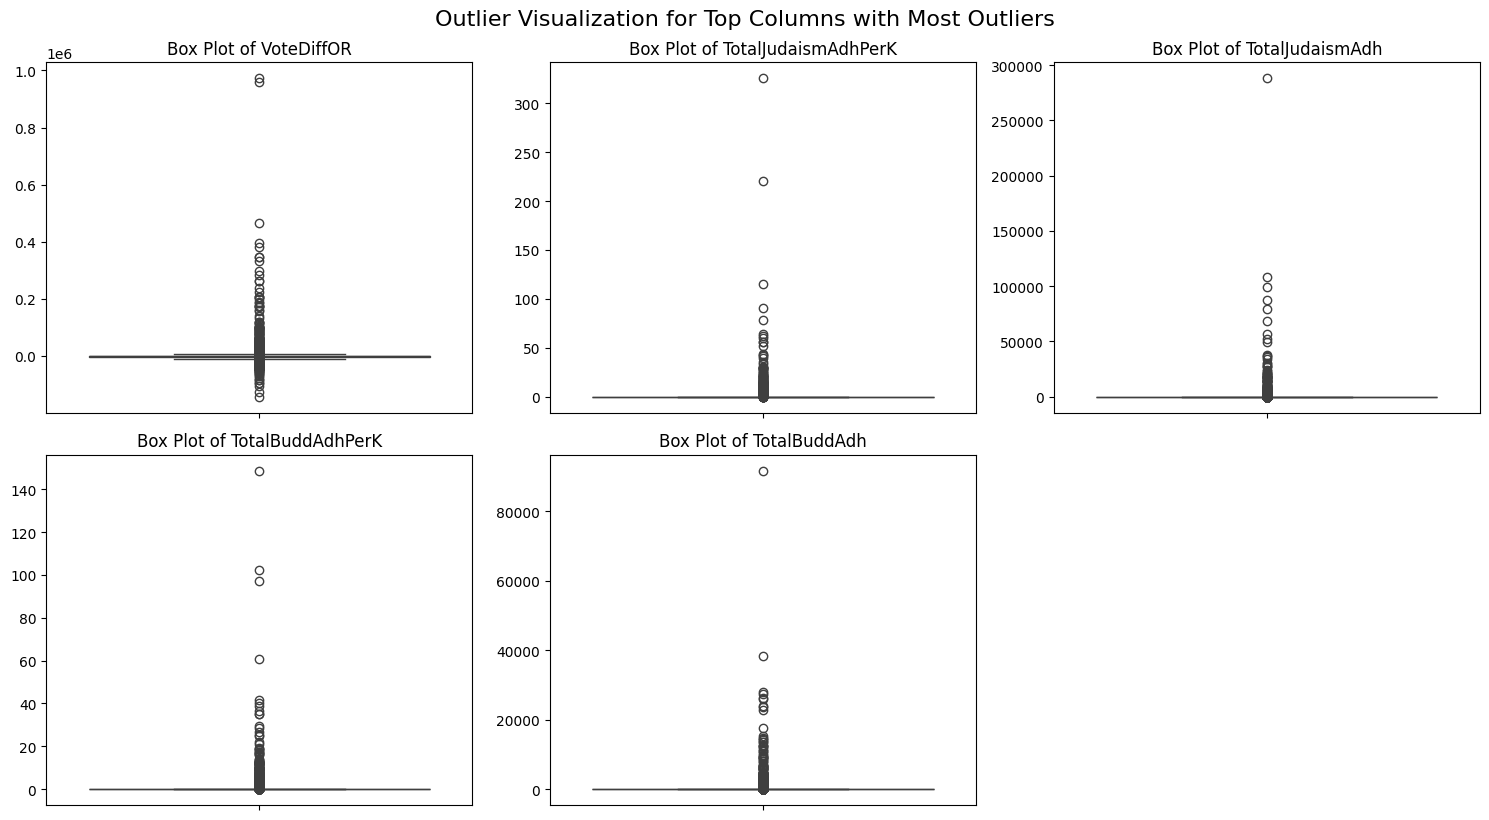

In [342]:
# Sort outlier_df to get columns with the most outliers
top_outlier_cols = outlier_df.sort_values(by='Outlier Count', ascending=False).head(5)['Numeric Column'].tolist()

print(f"Top 5 columns with the most outliers for visualization: {top_outlier_cols}")

# Create box plots for these top columns
plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel('') # Remove y-label to avoid clutter, as column name is title
plt.tight_layout()
plt.suptitle('Outlier Visualization for Top Columns with Most Outliers', y=1.02, fontsize=16)
plt.show()

### Identifying numeric columns
This cell identifies and lists all columns in the DataFrame `df` that have a numeric data type (integers or floats).
- `df.select_dtypes()` is used to select columns with `int64` or `float64` types.
- The names of these columns are stored in `numeric_cols`.

In [343]:
# Identify numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric Columns:", numeric_cols)

Numeric Columns: ['CountyPop', 'ClintonVotes', 'TrumpVotes', 'TotalVotes', 'PctClinton', 'PctTrump', 'VoteDiffCT', 'VoteDiffTC', 'PctDiffCT', 'PctDiffTC', 'ObamaVotes', 'RomneyVotes', 'TotalVotes2012', 'PctObama', 'PctRomney', 'VoteDiffOR', 'PctDiffOR', 'ClintonBWObama', 'TrumpBWRomney', 'PctClintonBWObama', 'PctTrumpBWRomney', 'LandArea2010', 'Density', 'StateFIPS', 'CountyFIPS', 'CBSACode', 'Population2010', 'TotalCongregations', 'TotalAdherents', 'TotalAdhPerK', 'EvangProtAdh', 'EvangProtPerK', 'MainProtAdh', 'MainProtPerK', 'CatholicAdh', 'CatholicAdhPerK', 'BahaiAdh', 'BahaiAdhPerK', 'TotalBuddAdh', 'TotalBuddAdhPerK', 'LDSAdh', 'LDSAdhPerK', 'TotalHinduAdh', 'TotalHinduAdhPerK', 'TotalJudaismAdh', 'TotalJudaismAdhPerK']


### Displaying statistical summary of numeric columns
This cell generates and displays descriptive statistics for all identified numeric columns in the DataFrame `df`.
- `df[numeric_cols].describe().T` provides statistics like mean, std, min, max, and quartiles, transposed for better readability.

In [344]:
# Display statistical summary for numeric columns
print("\nStatistical Summary of Numeric Columns:")
display(df[numeric_cols].describe().T)


Statistical Summary of Numeric Columns:


,count,mean,std,min,25%,50%,75%,max
CountyPop,3113.0,103247.604240,330801.030726,1.120000e+02,11185.000000,25876.000000,68348.000000,1.017029e+07
ClintonVotes,3113.0,20042.189207,71902.194372,4.000000e+00,1166.000000,3155.000000,9608.000000,1.893770e+06
TrumpVotes,3113.0,19635.707035,40404.556313,5.700000e+01,3206.000000,7169.000000,17446.000000,6.202850e+05
TotalVotes,3113.0,41742.585609,113258.645957,6.400000e+01,4822.000000,10948.000000,28828.000000,2.652072e+06
PctClinton,3113.0,0.317090,0.153557,3.144654e-02,0.204769,0.284857,0.399489,9.284659e-01
PctTrump,3113.0,0.636118,0.156486,4.122067e-02,0.549460,0.667407,0.751438,9.527273e-01
VoteDiffCT,3113.0,406.482172,44252.866020,-1.044440e+05,-6793.000000,-2801.000000,-854.000000,1.273485e+06
VoteDiffTC,3113.0,-406.482172,44252.866020,-1.273485e+06,854.000000,2801.000000,6793.000000,1.044440e+05
PctDiffCT,3113.0,-0.319028,0.308776,-9.163636e-01,-0.546886,-0.382120,-0.149070,8.872452e-01
PctDiffTC,3113.0,0.319028,0.308776,-8.872452e-01,0.149070,0.382120,0.546886,9.163636e-01


### Outlier analysis using IQR
This cell defines a function `find_outliers_iqr` to detect outliers using the Interquartile Range (IQR) method.
- It calculates Q1, Q3, and IQR.
- Determines lower and upper bounds (Q1 - 1.5*IQR, Q3 + 1.5*IQR).
- Identifies data points outside these bounds as outliers.
- It then applies this function to all numeric columns and displays a summary of outlier counts for each.

In [345]:
# Function to detect outliers using IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("\nOutlier Analysis (using IQR):")
outlier_counts = {}
for col in numeric_cols:
    outliers = find_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

outlier_df = pd.DataFrame(outlier_counts.items(), columns=['Numeric Column', 'Outlier Count'])
display(outlier_df)


Outlier Analysis (using IQR):


,Numeric Column,Outlier Count
0,CountyPop,420
1,ClintonVotes,458
2,TrumpVotes,384
3,TotalVotes,423
4,PctClinton,73
5,PctTrump,68
6,VoteDiffCT,478
7,VoteDiffTC,478
8,PctDiffCT,69
9,PctDiffTC,69


### Summarizing outlier details for top columns
This cell provides a detailed summary of outlier detection for the top columns previously identified as having the most outliers.
- For each of these columns, it calculates Q1, Q3, IQR, lower bound, upper bound, and the count of outliers.
- The results are presented in a structured DataFrame, `outlier_summary_df`.

In [346]:
outlier_summary_data = []

# Reuse the numeric_cols list and the find_outliers_iqr function from previous steps

for i, col in enumerate(top_outlier_cols):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = find_outliers_iqr(df, col)
    outlier_count = len(outliers)

    outlier_summary_data.append({
        'Serial': i + 1,
        'Feature': col,
        'Q1': Q1,
        'Q3': Q3,
        'Lower Bound': lower_bound,
        'Upper_Bound': upper_bound,
        'Outlier Count': outlier_count
    })

outlier_summary_df = pd.DataFrame(outlier_summary_data)
display(outlier_summary_df)

,Serial,Feature,Q1,Q3,Lower Bound,Upper_Bound,Outlier Count
0,1,VoteDiffOR,-4396.0,-239.0,-10631.5,5996.5,582
1,2,TotalJudaismAdhPerK,0.0,0.0,0.0,0.0,543
2,3,TotalJudaismAdh,0.0,0.0,0.0,0.0,543
3,4,TotalBuddAdhPerK,0.0,0.0,0.0,0.0,532
4,5,TotalBuddAdh,0.0,0.0,0.0,0.0,532


### Capping outliers for all numeric columns
This cell performs outlier treatment by capping values in all numeric columns.
- For each numeric feature, it calculates the IQR-based lower and upper bounds.
- Values below the lower bound are set to the lower bound, and values above the upper bound are set to the upper bound.
- This process limits extreme values without removing entire rows.

In [347]:
# Cap outliers for all numeric columns
print("Capping outliers for numeric columns...")
for feature in numeric_cols:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[feature] = df[feature].clip(lower_bound, upper_bound)

print("Outliers have been capped for all numeric features.")

Capping outliers for numeric columns...
Outliers have been capped for all numeric features.


### Verifying outlier counts after capping
This cell re-evaluates the outlier counts for all numeric columns after the capping operation.
- It applies the `find_outliers_iqr` function again.
- The expected outcome is that `Outlier Count` for most (if not all) columns should be zero or significantly reduced, confirming the capping was effective.

In [348]:
# Verify outlier counts after capping
print("\nOutlier Analysis (using IQR) after capping:")
outlier_counts_after_capping = {}
for col in numeric_cols:
    outliers = find_outliers_iqr(df, col)
    outlier_counts_after_capping[col] = len(outliers)

outlier_df_after_capping = pd.DataFrame(outlier_counts_after_capping.items(), columns=['Numeric Column', 'Outlier Count'])
display(outlier_df_after_capping)


Outlier Analysis (using IQR) after capping:


,Numeric Column,Outlier Count
0,CountyPop,0
1,ClintonVotes,0
2,TrumpVotes,0
3,TotalVotes,0
4,PctClinton,0
5,PctTrump,0
6,VoteDiffCT,0
7,VoteDiffTC,0
8,PctDiffCT,0
9,PctDiffTC,0


### Visualizing top columns after outlier capping
This cell re-generates box plots for the same top 5 columns that previously showed the most outliers.
- The plots are created *after* the outlier capping process.
- This visualization demonstrates the effect of capping, where extreme points are now contained within the bounds, showing a 'cleaner' distribution.

Visualizing Top 5 columns after outlier capping: ['VoteDiffOR', 'TotalJudaismAdhPerK', 'TotalJudaismAdh', 'TotalBuddAdhPerK', 'TotalBuddAdh']


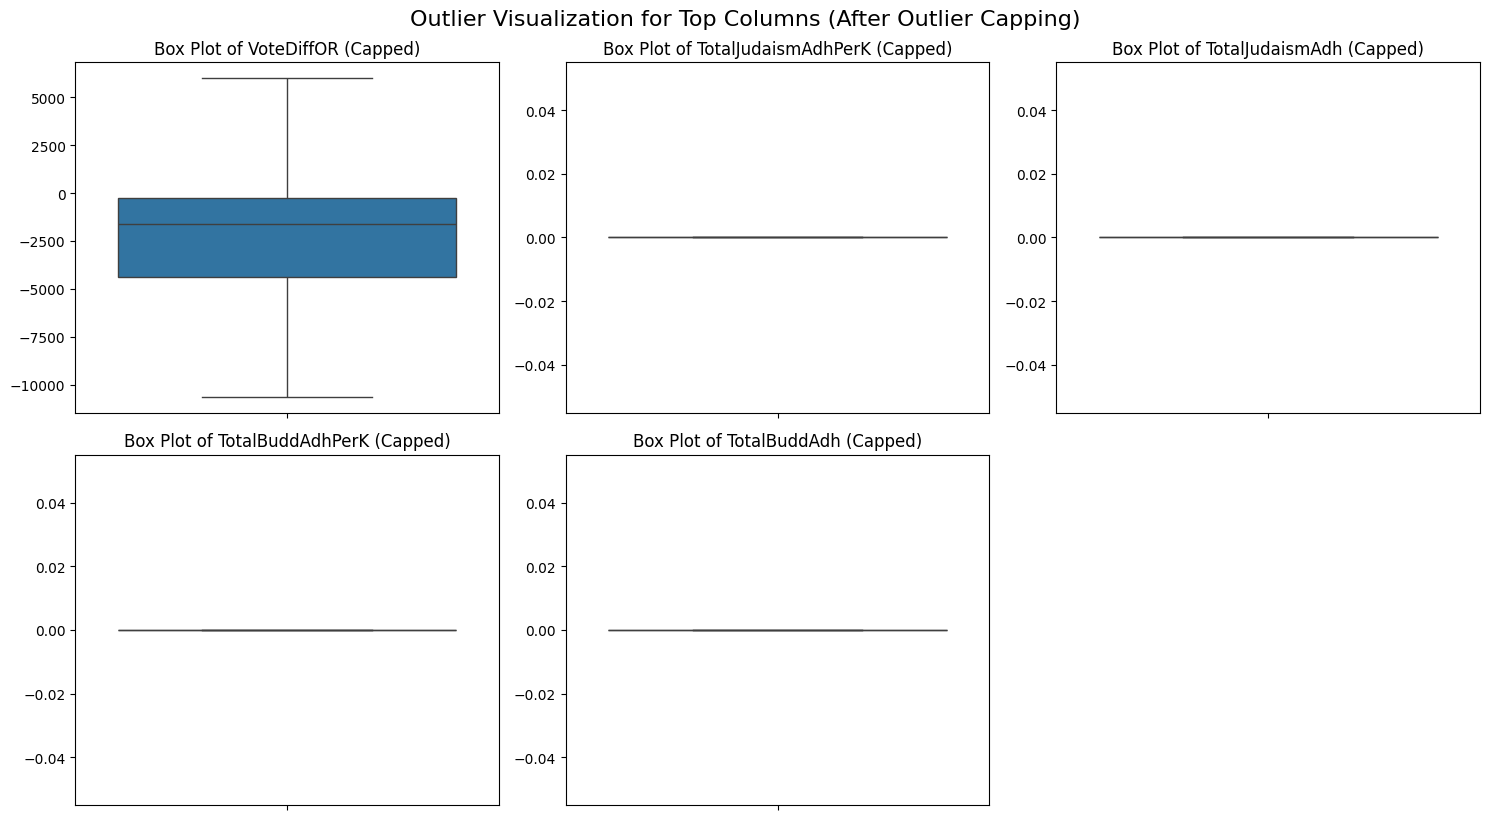

In [349]:
print(f"Visualizing Top 5 columns after outlier capping: {top_outlier_cols}")

# Create box plots for these top columns after capping
plt.figure(figsize=(15, 8))
for i, col in enumerate(top_outlier_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid as needed
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col} (Capped)')
    plt.ylabel('') # Remove y-label to avoid clutter
plt.tight_layout()
plt.suptitle('Outlier Visualization for Top Columns (After Outlier Capping)', y=1.02, fontsize=16)
plt.show()

### Bar plot of total votes for Clinton and Trump by State
This cell generates a bar plot comparing the total votes received by Clinton and Trump for each state.
- It aggregates 'ClintonVotes' and 'TrumpVotes' by 'StateCode'.
- `votes_melted` DataFrame is created to facilitate plotting with `seaborn.barplot()`.
- The plot helps visualize which candidate received more votes in different states.

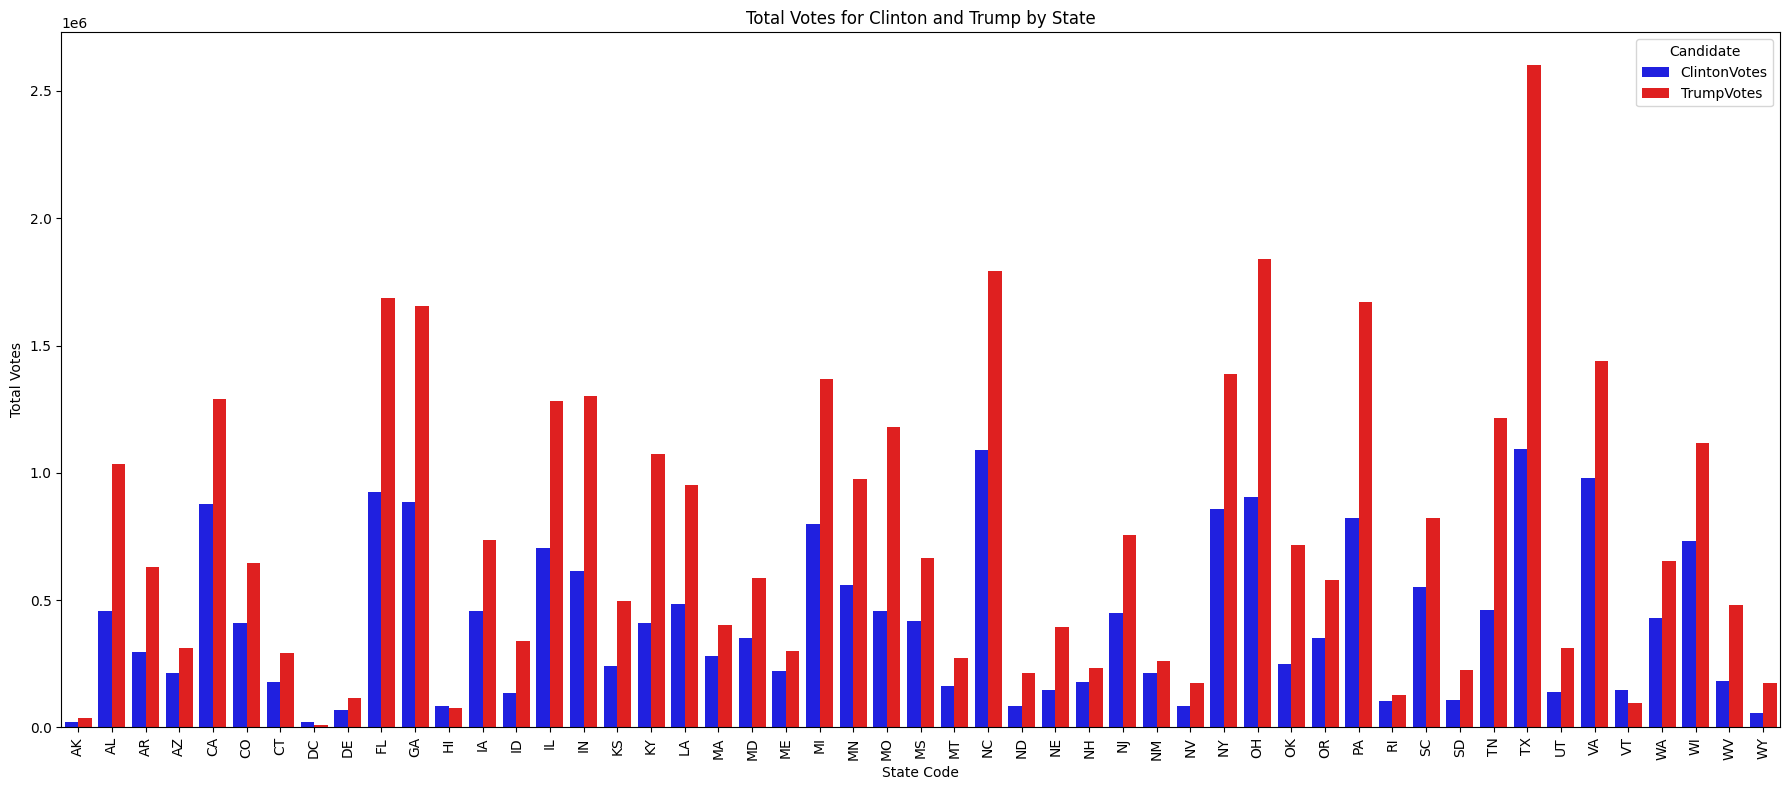

In [350]:
# Aggregate Clinton and Trump votes by StateCode
votes_by_state = df.groupby('StateCode')[['ClintonVotes', 'TrumpVotes']].sum().reset_index()

# Melt the DataFrame for easier plotting with seaborn
votes_melted = votes_by_state.melt(id_vars='StateCode', var_name='Candidate', value_name='TotalVotes')

plt.figure(figsize=(18, 8))
sns.barplot(data=votes_melted, x='StateCode', y='TotalVotes', hue='Candidate', palette={'ClintonVotes': 'blue', 'TrumpVotes': 'red'})
plt.title('Total Votes for Clinton and Trump by State')
plt.xlabel('State Code')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.legend(title='Candidate')
plt.tight_layout()
plt.show()

### Applying Min-Max Normalization to numerical columns
This cell applies Min-Max Normalization to all numerical columns in the DataFrame `df`.
- It scales the values of each feature to a range between 0 and 1.
- `MinMaxScaler` from `sklearn.preprocessing` is used.
- This process is useful for algorithms that are sensitive to feature scales.

In [351]:
# Identify numerical columns for normalization
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply scaler to numerical columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Normalization complete. Displaying the first 5 rows of the normalized DataFrame:")
display(df.head())

Normalization complete. Displaying the first 5 rows of the normalized DataFrame:


,StateCode,CountyName,CountyPop,CTState,ClintonVotes,TrumpVotes,TotalVotes,PctClinton,PctTrump,VoteDiffCT,...,BahaiAdh,BahaiAdhPerK,TotalBuddAdh,TotalBuddAdhPerK,LDSAdh,LDSAdhPerK,TotalHinduAdh,TotalHinduAdhPerK,TotalJudaismAdh,TotalJudaismAdhPerK
0,AL,Autauga County,0.358714,Trump,0.265146,0.465896,0.379742,0.315278,0.690798,0.147310,...,0.537815,0.565056,0.0,0.0,0.540721,0.509787,0.0,0.0,0.0,0.0
1,AL,Baldwin County,1.000000,Trump,0.826559,1.000000,1.000000,0.248751,0.746242,0.000000,...,0.605042,0.182687,0.0,0.0,0.675567,0.187290,0.0,0.0,0.0,0.0
2,AL,Barbour County,0.171301,Trump,0.217542,0.138687,0.159418,0.659204,0.391119,0.636408,...,0.092437,0.125332,0.0,0.0,0.170227,0.325617,0.0,0.0,0.0,0.0
3,AL,Bibb County,0.145934,Trump,0.083981,0.172288,0.134068,0.276878,0.740787,0.456411,...,0.033613,0.115773,0.0,0.0,0.310414,0.252306,0.0,0.0,0.0,0.0
4,AL,Blount County,0.373820,Trump,0.096376,0.587138,0.390904,0.080671,0.923243,0.000000,...,0.000000,0.009559,0.0,0.0,0.187583,0.169143,0.0,0.0,0.0,0.0


### Applying Standardization to numerical columns
This cell applies Standardization (Z-score normalization) to all numerical columns in the DataFrame `df`.
- It transforms data to have a mean of 0 and a standard deviation of 1.
- `StandardScaler` from `sklearn.preprocessing` is used.
- This is beneficial for many machine learning models, making features comparable across different scales.

In [352]:
# Identify numerical columns for standardization (should be the same as for normalization)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaler to numerical columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Standardization complete. Displaying the first 5 rows of the standardized DataFrame:")
display(df.head())

Standardization complete. Displaying the first 5 rows of the standardized DataFrame:


,StateCode,CountyName,CountyPop,CTState,ClintonVotes,TrumpVotes,TotalVotes,PctClinton,PctTrump,VoteDiffCT,...,BahaiAdh,BahaiAdhPerK,TotalBuddAdh,TotalBuddAdhPerK,LDSAdh,LDSAdhPerK,TotalHinduAdh,TotalHinduAdhPerK,TotalJudaismAdh,TotalJudaismAdhPerK
0,AL,Autauga County,0.120091,Trump,-0.114597,0.442944,0.181128,-0.510646,0.634808,-1.421323,...,0.710120,0.758913,0.0,0.0,0.350315,0.236399,0.0,0.0,0.0,0.0
1,AL,Baldwin County,2.041425,Trump,1.509739,2.087093,2.039810,-0.807066,0.891342,-2.014214,...,0.897907,-0.523899,0.0,0.0,0.806626,-0.977917,0.0,0.0,0.0,0.0
2,AL,Barbour County,-0.441412,Trump,-0.252329,-0.564312,-0.479098,1.021785,-0.751765,0.547186,...,-0.533968,-0.716321,0.0,0.0,-0.903412,-0.457066,0.0,0.0,0.0,0.0
3,AL,Bibb County,-0.517413,Trump,-0.638761,-0.460878,-0.555063,-0.681741,0.866099,-0.177261,...,-0.698281,-0.748391,0.0,0.0,-0.429029,-0.733105,0.0,0.0,0.0,0.0
4,AL,Blount County,0.165349,Trump,-0.602898,0.816166,0.214577,-1.555983,1.710300,-2.014214,...,-0.792175,-1.104728,0.0,0.0,-0.844679,-1.046246,0.0,0.0,0.0,0.0


### Identifying potentially invalid rows after standardization
This cell checks for extreme values in the numerical columns after standardization.
- It flags rows where any numerical feature has an absolute value greater than 3 (i.e., more than 3 standard deviations from the mean).
- These rows are considered 'potentially invalid' or statistical anomalies.
- The cell prints the count of such rows and displays the head of these rows if any are found, asking the user if they wish to remove them.

In [353]:
# Define a threshold for extreme values after standardization
extreme_threshold = 3

# Identify rows where any numerical column has an absolute value greater than the threshold
potentially_invalid_rows = df[(df[numeric_cols].abs() > extreme_threshold).any(axis=1)]

print(f"Found {len(potentially_invalid_rows)} rows with values more than {extreme_threshold} standard deviations from the mean (0) in at least one numeric column after standardization.")

if not potentially_invalid_rows.empty:
    print("\nThese are the rows that might contain 'invalid' (extremely unusual) data points based on statistical anomaly:")
    display(potentially_invalid_rows.head()) # Display the first few potentially invalid rows
    print(f"\nWould you like to filter (remove) these {len(potentially_invalid_rows)} rows from the dataset?")
else:
    print("No rows found with values more than 3 standard deviations from the mean in any numeric column after standardization, indicating a well-behaved dataset post-processing.")

Found 0 rows with values more than 3 standard deviations from the mean (0) in at least one numeric column after standardization.
No rows found with values more than 3 standard deviations from the mean in any numeric column after standardization, indicating a well-behaved dataset post-processing.


### Checking for negative values in conceptually non-negative columns after standardization
This cell examines numerical columns that, conceptually, should not have negative values (e.g., population, votes, area).
- After standardization, negative values indicate a data point is below the mean.
- It counts and reports the number of negative values in these specific columns.
- It clarifies that negative standardized values are normal and asks if the user still wants to filter them out.

In [354]:
# Identify columns that conceptually should not have negative original values
conceptually_non_negative_cols = [
    'CountyPop', 'ClintonVotes', 'TrumpVotes', 'TotalVotes', 'ObamaVotes', 'RomneyVotes',
    'TotalVotes2012', 'LandArea2010', 'Population2010', 'TotalCongregations', 'TotalAdherents',
    'EvangProtAdh', 'MainProtAdh', 'CatholicAdh', 'BahaiAdh', 'TotalBuddAdh', 'LDSAdh',
    'TotalHinduAdh', 'TotalJudaismAdh'
]

# Filter only those columns that are actually in our DataFrame
conceptually_non_negative_cols_in_df = [col for col in conceptually_non_negative_cols if col in df.columns]

print("Checking for negative values in conceptually non-negative columns (after standardization):")

negative_value_summary = {}
for col in conceptually_non_negative_cols_in_df:
    negative_count = df[df[col] < 0][col].count()
    if negative_count > 0:
        negative_value_summary[col] = negative_count

if negative_value_summary:
    print("\nFound negative values in the following columns (count of negative values):")
    for col, count in negative_value_summary.items():
        print(f"  - {col}: {count} negative values")
    print("\nThese negative values simply indicate that the original data point was below the mean after standardization. \nDo you still wish to filter out the rows containing these negative standardized values?")
else:
    print("No conceptually non-negative columns have negative values after standardization, which means all their values are at or above their respective means.")

Checking for negative values in conceptually non-negative columns (after standardization):

Found negative values in the following columns (count of negative values):
  - CountyPop: 2122 negative values
  - ClintonVotes: 2128 negative values
  - TrumpVotes: 2068 negative values
  - TotalVotes: 2124 negative values
  - ObamaVotes: 2122 negative values
  - RomneyVotes: 2097 negative values
  - TotalVotes2012: 2121 negative values
  - LandArea2010: 1935 negative values
  - Population2010: 2113 negative values
  - TotalCongregations: 1985 negative values
  - TotalAdherents: 2084 negative values
  - EvangProtAdh: 2066 negative values
  - MainProtAdh: 2078 negative values
  - CatholicAdh: 2143 negative values
  - BahaiAdh: 2173 negative values
  - LDSAdh: 2100 negative values

These negative values simply indicate that the original data point was below the mean after standardization. 
Do you still wish to filter out the rows containing these negative standardized values?


### Dropping highly correlated features
This cell identifies and removes features that are highly correlated with each other (absolute correlation > 0.9).
- It computes the absolute correlation matrix for all numeric columns.
- It then selects the upper triangle of the matrix to avoid duplicate pairs and self-correlation.
- Columns exceeding the 0.9 threshold are identified and dropped to reduce multicollinearity and improve model performance.
- The `numeric_cols` list is updated after dropping columns.

In [355]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numeric_cols].corr().abs()

# Select upper triangle of correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.9 (absolute value)
to_drop_highly_correlated = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]

print(f"Original DataFrame shape: {df.shape}")
print(f"Features to drop due to high correlation (> 0.9): {to_drop_highly_correlated}")

# Drop features
df = df.drop(columns=to_drop_highly_correlated)

print(f"New DataFrame shape after dropping highly correlated features: {df.shape}")

# Update numeric_cols list after dropping columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Updated numeric columns: {numeric_cols}")

Original DataFrame shape: (3113, 54)
Features to drop due to high correlation (> 0.9): ['ClintonVotes', 'TrumpVotes', 'TotalVotes', 'PctTrump', 'VoteDiffTC', 'PctDiffCT', 'PctDiffTC', 'ObamaVotes', 'RomneyVotes', 'TotalVotes2012', 'PctObama', 'PctRomney', 'VoteDiffOR', 'PctDiffOR', 'PctTrumpBWRomney', 'Population2010', 'TotalCongregations', 'TotalAdherents']
New DataFrame shape after dropping highly correlated features: (3113, 36)
Updated numeric columns: ['CountyPop', 'PctClinton', 'VoteDiffCT', 'ClintonBWObama', 'TrumpBWRomney', 'PctClintonBWObama', 'LandArea2010', 'Density', 'StateFIPS', 'CountyFIPS', 'CBSACode', 'TotalAdhPerK', 'EvangProtAdh', 'EvangProtPerK', 'MainProtAdh', 'MainProtPerK', 'CatholicAdh', 'CatholicAdhPerK', 'BahaiAdh', 'BahaiAdhPerK', 'TotalBuddAdh', 'TotalBuddAdhPerK', 'LDSAdh', 'LDSAdhPerK', 'TotalHinduAdh', 'TotalHinduAdhPerK', 'TotalJudaismAdh', 'TotalJudaismAdhPerK']


### Visualizing the correlation heatmap of remaining numeric features
This cell generates a heatmap to visualize the correlation between the remaining numeric features after highly correlated ones have been removed.
- It calculates the correlation matrix for the `numeric_cols` that are still in the DataFrame.
- `seaborn.heatmap()` is used to display the correlations with annotations.
- This helps in understanding the relationships between the features that will be used for modeling.

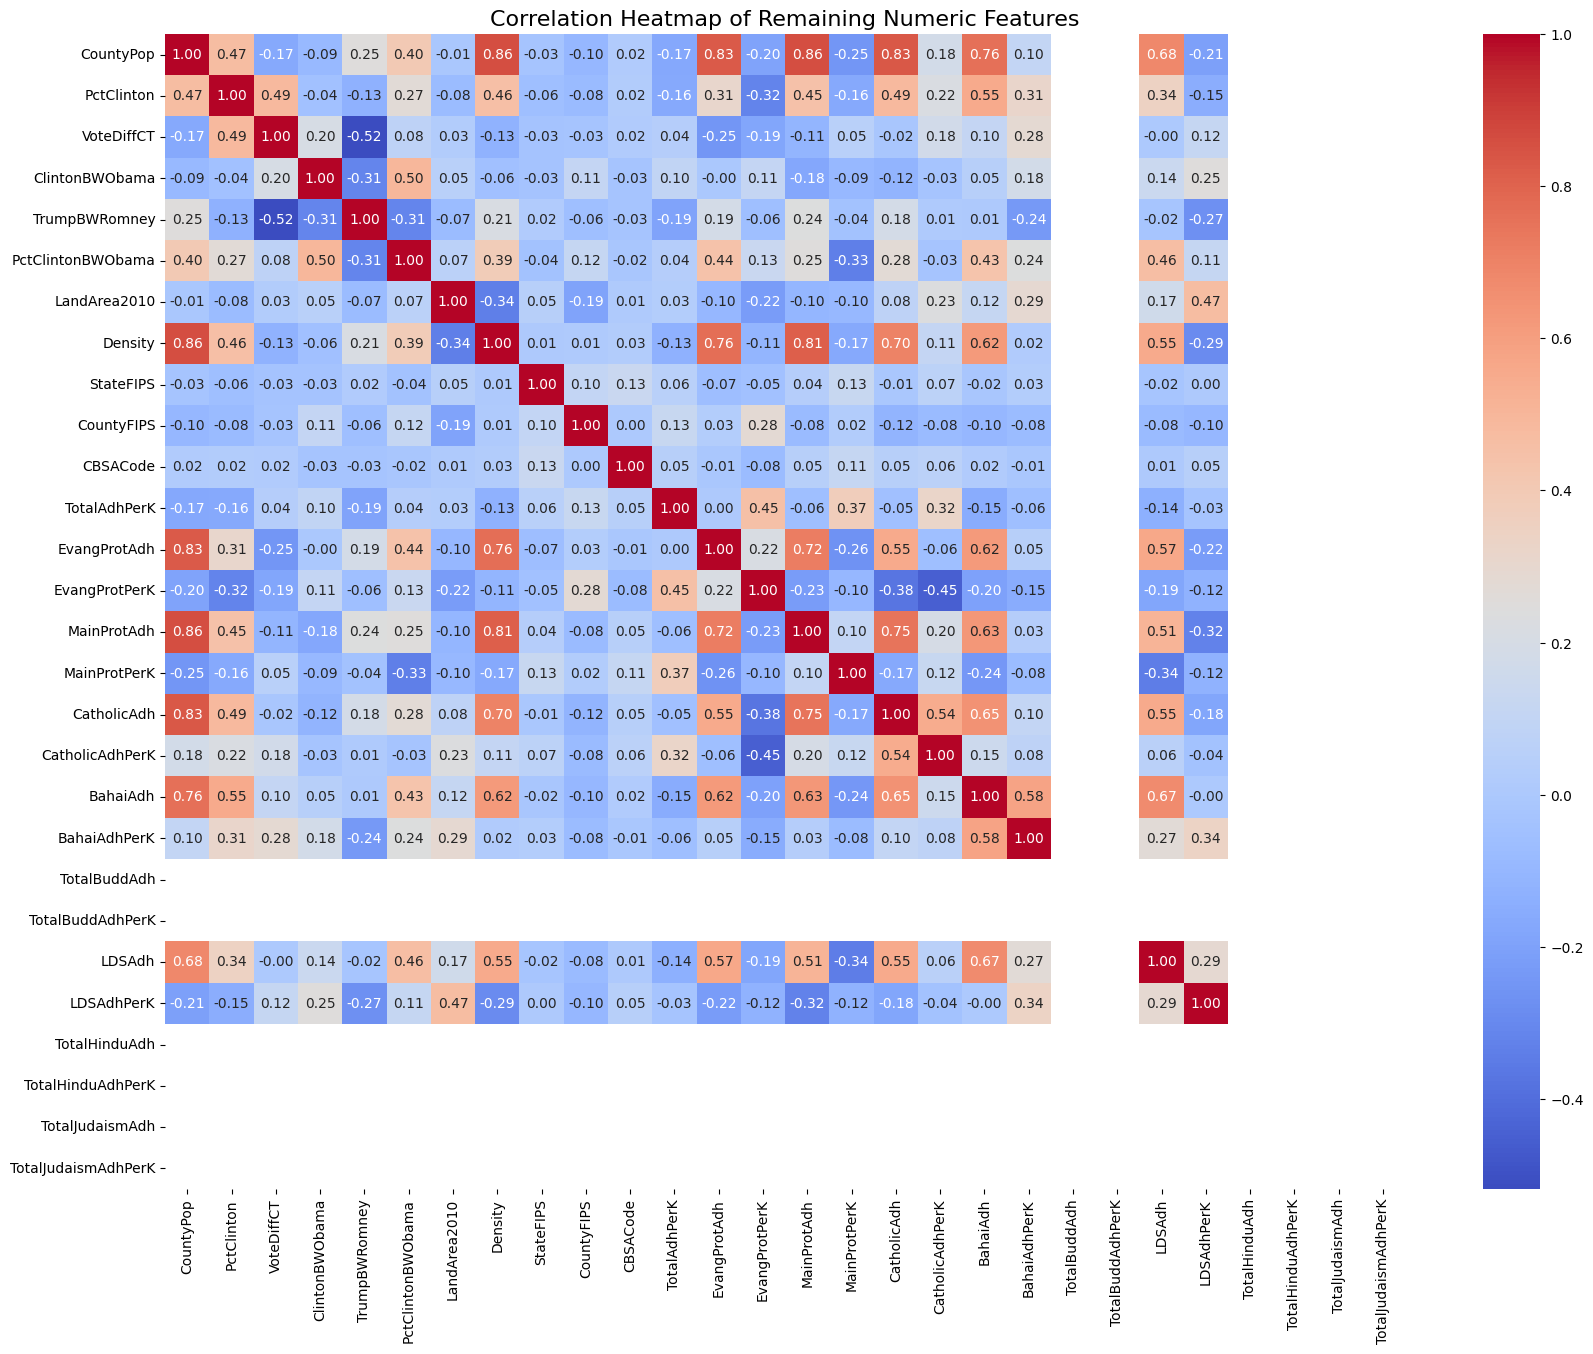

In [356]:
plt.figure(figsize=(20, 15))
# Calculate correlation only for the remaining numeric columns
correlation_matrix_final = df[numeric_cols].corr()
sns.heatmap(correlation_matrix_final, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Remaining Numeric Features', fontdict={'fontsize': 16})
plt.show()

### Step 1: Descriptive Statistics of Numeric Features

This step displays the descriptive statistics (like mean, standard deviation, min, max, and quartiles) for all numeric features remaining in the dataset after correlation-based feature selection, outlier capping, and standardization. This provides a summary of their current ranges and distributions.

In [358]:
# 1. Display descriptive statistics for numeric features after correlation-based feature selection
print("Descriptive statistics for numeric features after correlation-based feature selection:")
display(df[numeric_cols].describe().T)

Descriptive statistics for numeric features after correlation-based feature selection:


,count,mean,std,min,25%,50%,75%,max
CountyPop,3113.0,9.130006e-18,1.000161,-0.954641,-0.739189,-0.453340,0.373057,2.041425
PctClinton,3113.0,4.565003e-18,1.000161,-1.915425,-0.745533,-0.204957,0.568786,2.540265
VoteDiffCT,3113.0,5.706254e-17,1.000161,-2.014214,-0.504922,0.171409,0.501273,2.010565
ClintonBWObama,3113.0,-1.917301e-16,1.000161,-1.953056,-0.465956,0.180200,0.525445,2.012546
TrumpBWRomney,3113.0,9.130006e-18,1.000161,-2.112574,-0.559470,-0.202892,0.475932,2.029036
PctClintonBWObama,3113.0,8.217006e-17,1.000161,-2.775043,-0.692723,0.099426,0.695490,2.777809
LandArea2010,3113.0,9.130006e-17,1.000161,-1.707358,-0.709209,-0.287316,0.421085,2.116526
Density,3113.0,-1.164076e-16,1.000161,-0.929634,-0.739738,-0.431638,0.362561,2.016008
StateFIPS,3113.0,7.304005e-17,1.000161,-1.975066,-0.771900,-0.103474,1.032850,1.701276
CountyFIPS,3113.0,-2.739002e-16,1.000161,-1.252811,-0.793685,-0.206273,0.529679,2.514725


### Step 2: Correlation with the Target Variable

Here, we calculate the absolute correlation of each numeric feature with our target variable, `CTState_Numeric` (where 0 represents Clinton outcomes and 1 represents Trump outcomes). This helps identify features that have the strongest linear relationship with the election outcome, ranked from most to least correlated.

In [372]:
# 2. Calculate correlation with the target variable 'CTState_Numeric'
# Map 'CTState' to numerical values for correlation analysis if not already done
if 'CTState_Numeric' not in df.columns:
    df['CTState_Numeric'] = df['CTState'].map({'Clinton': 0, 'Trump': 1})

# Identify numeric features for correlation
features_for_correlation_all = [col for col in numeric_cols if col != 'CTState_Numeric']

# Filter out columns with zero standard deviation to avoid RuntimeWarning
# A small epsilon is used to account for potential floating point inaccuracies
std_devs = df[features_for_correlation_all].std()
features_for_correlation = std_devs[std_devs > 1e-9].index.tolist()

# Calculate correlation of numeric features with the new numerical target
correlation_with_target = df[features_for_correlation].corrwith(df['CTState_Numeric']).abs().sort_values(ascending=False)

print("\nCorrelation of Numeric Features with Election Outcome (CTState_Numeric - Absolute Value):\n")
display(correlation_with_target)


Correlation of Numeric Features with Election Outcome (CTState_Numeric - Absolute Value):



,0
PctClinton,0.324572
EvangProtPerK,0.314526
CatholicAdh,0.260246
BahaiAdh,0.236209
CatholicAdhPerK,0.220348
VoteDiffCT,0.216909
LDSAdh,0.198200
BahaiAdhPerK,0.197952
CountyPop,0.177263
TotalAdhPerK,0.174619


### Step 3: Filtering Highly Correlated Features

Based on the correlation analysis, this step filters the dataset to retain only those features that have an absolute correlation greater than 0.1 with the target variable. We also ensure that essential contextual columns (`CTState`, `CountyName`, `StateCode`, `CTState_Numeric`) are kept. This reduces the dimensionality and focuses the dataset on the most predictive features.

In [359]:
# 3. Filter the dataset to include only highly correlated features
# Identify features with absolute correlation > 0.1 with the target
highly_correlated_feature_names = correlation_with_target[correlation_with_target > 0.1].index.tolist()

# Ensure the target variable and CountyName, StateCode are included for context
features_to_keep = list(set(highly_correlated_feature_names + ['CTState', 'CountyName', 'StateCode', 'CTState_Numeric']))

# Filter the DataFrame to include only these selected features
df_selected_features = df[features_to_keep]

print(f"Original DataFrame shape: {df.shape}")
print(f"New DataFrame shape with selected features: {df_selected_features.shape}")
print("\nFirst 5 rows of the filtered DataFrame:")
display(df_selected_features.head())
print("\nInformation about the filtered DataFrame:")
df_selected_features.info()

Original DataFrame shape: (3113, 37)
New DataFrame shape with selected features: (3113, 20)

First 5 rows of the filtered DataFrame:


,CatholicAdh,BahaiAdhPerK,StateCode,CountyName,TotalAdhPerK,CountyPop,CTState,PctClinton,MainProtAdh,LDSAdhPerK,CatholicAdhPerK,VoteDiffCT,LandArea2010,Density,EvangProtPerK,CountyFIPS,CBSACode,BahaiAdh,LDSAdh,CTState_Numeric
0,-0.524910,0.758913,AL,Autauga County,0.932031,0.120091,Trump,-0.510646,-0.007634,0.236399,-0.766864,-1.421323,-0.326134,0.089272,1.729048,-1.252811,0.467673,0.710120,0.350315,1
1,1.376930,-0.523899,AL,Baldwin County,0.102456,2.041425,Trump,-0.807066,2.156779,-0.977917,-0.380102,-2.014214,1.994418,0.472603,0.549858,-1.225804,-1.047127,0.897907,0.806626,1
2,-0.709921,-0.716321,AL,Barbour County,0.206768,-0.441412,Trump,1.021785,-0.501634,-0.457066,-0.866108,0.547186,0.351003,-0.602045,0.563252,-1.198796,-0.803677,-0.533968,-0.903412,1
3,-0.694076,-0.748391,AL,Bibb County,-0.085821,-0.517413,Trump,-0.681741,-0.882815,-0.733105,-0.914258,-0.177261,-0.260528,-0.532685,1.344165,-1.171789,-1.617258,-0.698281,-0.429029,1
4,-0.062304,-1.104728,AL,Blount County,0.787658,0.165349,Trump,-1.555983,-0.316021,-1.046246,-0.328813,-2.014214,-0.208770,0.049200,1.765911,-1.144781,-1.617258,-0.792175,-0.844679,1



Information about the filtered DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3113 entries, 0 to 3112
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CatholicAdh      3113 non-null   float64
 1   BahaiAdhPerK     3113 non-null   float64
 2   StateCode        3113 non-null   object 
 3   CountyName       3113 non-null   object 
 4   TotalAdhPerK     3113 non-null   float64
 5   CountyPop        3113 non-null   float64
 6   CTState          3113 non-null   object 
 7   PctClinton       3113 non-null   float64
 8   MainProtAdh      3113 non-null   float64
 9   LDSAdhPerK       3113 non-null   float64
 10  CatholicAdhPerK  3113 non-null   float64
 11  VoteDiffCT       3113 non-null   float64
 12  LandArea2010     3113 non-null   float64
 13  Density          3113 non-null   float64
 14  EvangProtPerK    3113 non-null   float64
 15  CountyFIPS       3113 non-null   float64
 16  CBSACode         

### Step 4: Anomaly Detection using Local Outlier Factor (LOF)

This step applies the Local Outlier Factor (LOF) algorithm to the selected numeric features. LOF is a density-based anomaly detection method that identifies data points that have a substantially lower density than their neighbors. Anomalies are flagged as points that deviate significantly from the local data distribution. We estimate a 1% contamination (proportion of outliers).

In [360]:
# 4. Anomaly Detection using Local Outlier Factor (LOF) on selected features

# Identify numeric features for anomaly detection (excluding the target itself)
anomaly_detection_features = [col for col in df_selected_features.select_dtypes(include=['float64', 'int64']).columns.tolist() if col != 'CTState_Numeric']

# Prepare the data for LOF
X = df_selected_features[anomaly_detection_features]

# Initialize and fit the Local Outlier Factor model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01) # 1% contamination as an estimate
y_pred = lof.fit_predict(X)

# Anomalies are labeled as -1 by LOF, normal points as 1
df_selected_features['is_anomaly'] = y_pred

# Count the number of anomalies
anomalies_count = df_selected_features[df_selected_features['is_anomaly'] == -1].shape[0]

print(f"Number of Anomalies detected: {anomalies_count}")
print(f"Total rows in df_selected_features: {df_selected_features.shape[0]}")

if anomalies_count > 0:
    print("\nThese are some of the rows identified as anomalous:")
    display(df_selected_features[df_selected_features['is_anomaly'] == -1].head())
    print(f"\nWould you like to drop these {anomalies_count} anomalous rows from the dataset?")
else:
    print("No anomalies detected using LocalOutlierFactor with the current parameters.")

Number of Anomalies detected: 32
Total rows in df_selected_features: 3113

These are some of the rows identified as anomalous:


/tmp/ipython-input-3532959280.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_features['is_anomaly'] = y_pred


,CatholicAdh,BahaiAdhPerK,StateCode,CountyName,TotalAdhPerK,CountyPop,CTState,PctClinton,MainProtAdh,LDSAdhPerK,...,VoteDiffCT,LandArea2010,Density,EvangProtPerK,CountyFIPS,CBSACode,BahaiAdh,LDSAdh,CTState_Numeric,is_anomaly
246,-0.401103,1.143757,CO,Kiowa County,2.674708,-0.929132,Clinton,-1.407600,-0.892562,2.082225,...,0.538376,2.116526,-0.920825,2.803884,-0.442588,-1.001350,-0.792175,0.345797,0,-1
297,-0.791009,-0.331477,FL,Calhoun County,-0.605209,-0.675427,Trump,-0.752582,-0.856269,-0.632545,...,0.068062,-0.389339,-0.650675,0.147343,-1.090767,0.729850,1.602108,0.716267,1,-1
308,-0.674969,-0.331477,FL,Franklin County,-0.599386,-0.727981,Trump,-0.173472,-0.783061,-0.216122,...,0.242566,-0.465343,-0.688944,0.024571,-0.766677,0.729850,1.602108,-1.201595,1,-1
310,0.942985,-0.395618,FL,Gilchrist County,-0.745880,-0.622172,Trump,-0.959420,-0.926159,-0.632545,...,-0.249095,-0.896771,-0.391388,0.815459,-0.712663,-0.606004,-0.651335,0.716267,1,-1
323,-0.727785,-0.331477,FL,Lafayette County,-0.517816,-0.788260,Trump,-1.097715,-0.911642,-0.632545,...,0.259678,-0.445106,-0.755177,0.643641,-0.361566,0.729850,1.602108,0.716267,1,-1



Would you like to drop these 32 anomalous rows from the dataset?


### Step 5: Dropping Anomalous Rows

Following the identification of anomalous data points by the LOF model, this step removes them from the dataset. Removing anomalies helps improve the quality of the data, potentially leading to more robust and accurate machine learning models. A new DataFrame `df_selected_features_cleaned` is created without these anomalous entries.

In [361]:
# 5. Drop the anomalous rows as suggested by the lecturer's example
# Make an explicit copy to avoid SettingWithCopyWarning
df_selected_features = df_selected_features.copy() # Re-copy to ensure 'is_anomaly' is on a mutable df

# Drop the anomalous rows
df_selected_features_cleaned = df_selected_features[df_selected_features['is_anomaly'] == 1].drop(columns=['is_anomaly'])

print(f"Original df_selected_features shape: {df_selected_features.shape}")
print(f"New df_selected_features_cleaned shape after dropping anomalies: {df_selected_features_cleaned.shape}")
print("\nFirst 5 rows of the cleaned DataFrame (after anomaly removal):")
display(df_selected_features_cleaned.head())

Original df_selected_features shape: (3113, 21)
New df_selected_features_cleaned shape after dropping anomalies: (3081, 20)

First 5 rows of the cleaned DataFrame (after anomaly removal):


,CatholicAdh,BahaiAdhPerK,StateCode,CountyName,TotalAdhPerK,CountyPop,CTState,PctClinton,MainProtAdh,LDSAdhPerK,CatholicAdhPerK,VoteDiffCT,LandArea2010,Density,EvangProtPerK,CountyFIPS,CBSACode,BahaiAdh,LDSAdh,CTState_Numeric
0,-0.524910,0.758913,AL,Autauga County,0.932031,0.120091,Trump,-0.510646,-0.007634,0.236399,-0.766864,-1.421323,-0.326134,0.089272,1.729048,-1.252811,0.467673,0.710120,0.350315,1
1,1.376930,-0.523899,AL,Baldwin County,0.102456,2.041425,Trump,-0.807066,2.156779,-0.977917,-0.380102,-2.014214,1.994418,0.472603,0.549858,-1.225804,-1.047127,0.897907,0.806626,1
2,-0.709921,-0.716321,AL,Barbour County,0.206768,-0.441412,Trump,1.021785,-0.501634,-0.457066,-0.866108,0.547186,0.351003,-0.602045,0.563252,-1.198796,-0.803677,-0.533968,-0.903412,1
3,-0.694076,-0.748391,AL,Bibb County,-0.085821,-0.517413,Trump,-0.681741,-0.882815,-0.733105,-0.914258,-0.177261,-0.260528,-0.532685,1.344165,-1.171789,-1.617258,-0.698281,-0.429029,1
4,-0.062304,-1.104728,AL,Blount County,0.787658,0.165349,Trump,-1.555983,-0.316021,-1.046246,-0.328813,-2.014214,-0.208770,0.049200,1.765911,-1.144781,-1.617258,-0.792175,-0.844679,1


### Step 6: Checking for Imbalanced Data

This crucial step examines the class distribution of the target variable, `CTState_Numeric`, within the `df_selected_features_cleaned` DataFrame. It determines if one class has significantly fewer samples than the other, which is known as data imbalance. Imbalanced data can lead to models that are biased towards the majority class.

In [362]:
# 6. Check for Imbalanced Data in the target variable
# Check class distribution of the target variable
print("\nClass distribution of CTState_Numeric in the cleaned and selected DataFrame:")
class_distribution = df_selected_features_cleaned['CTState_Numeric'].value_counts(normalize=True) * 100
display(class_distribution)

if class_distribution.min() < 30:
    print("\nBased on the class distribution, the target variable appears to be imbalanced.")
    print("To handle this, we should consider:")
    print("1. Using appropriate evaluation metrics like Precision, Recall, and F1-score.")
    print("2. Employing resampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.")
else:
    print("\nThe target variable appears to be reasonably balanced, and resampling might not be necessary.")


Class distribution of CTState_Numeric in the cleaned and selected DataFrame:


,proportion
CTState_Numeric,
1,75.884453
0,24.115547



Based on the class distribution, the target variable appears to be imbalanced.
To handle this, we should consider:
1. Using appropriate evaluation metrics like Precision, Recall, and F1-score.
2. Employing resampling techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.


### Step 7: Handling Imbalanced Data with SMOTE

Since the target variable was found to be imbalanced, this step applies the Synthetic Minority Over-sampling Technique (SMOTE). SMOTE generates synthetic samples for the minority class, effectively balancing the class distribution. This prevents the predictive model from being biased towards the majority class and enhances its ability to learn from and accurately predict the minority class, leading to improved overall model performance.

In [363]:
print("Applying SMOTE to balance the dataset...")

# Separate features (X) and target (y)
X = df_selected_features_cleaned.drop(columns=['CTState_Numeric', 'CTState', 'CountyName', 'StateCode'])
y = df_selected_features_cleaned['CTState_Numeric']

print(f"Original dataset shape: {Counter(y)}")

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Resampled dataset shape: {Counter(y_resampled)}")

# Create a new DataFrame with resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['CTState_Numeric'] = y_resampled

print("SMOTE application complete. Displaying the first 5 rows of the resampled DataFrame:")
display(df_resampled.head())

Applying SMOTE to balance the dataset...
Original dataset shape: Counter({1: 2338, 0: 743})
Resampled dataset shape: Counter({1: 2338, 0: 2338})
SMOTE application complete. Displaying the first 5 rows of the resampled DataFrame:


,CatholicAdh,BahaiAdhPerK,TotalAdhPerK,CountyPop,PctClinton,MainProtAdh,LDSAdhPerK,CatholicAdhPerK,VoteDiffCT,LandArea2010,Density,EvangProtPerK,CountyFIPS,CBSACode,BahaiAdh,LDSAdh,CTState_Numeric
0,-0.524910,0.758913,0.932031,0.120091,-0.510646,-0.007634,0.236399,-0.766864,-1.421323,-0.326134,0.089272,1.729048,-1.252811,0.467673,0.710120,0.350315,1
1,1.376930,-0.523899,0.102456,2.041425,-0.807066,2.156779,-0.977917,-0.380102,-2.014214,1.994418,0.472603,0.549858,-1.225804,-1.047127,0.897907,0.806626,1
2,-0.709921,-0.716321,0.206768,-0.441412,1.021785,-0.501634,-0.457066,-0.866108,0.547186,0.351003,-0.602045,0.563252,-1.198796,-0.803677,-0.533968,-0.903412,1
3,-0.694076,-0.748391,-0.085821,-0.517413,-0.681741,-0.882815,-0.733105,-0.914258,-0.177261,-0.260528,-0.532685,1.344165,-1.171789,-1.617258,-0.698281,-0.429029,1
4,-0.062304,-1.104728,0.787658,0.165349,-1.555983,-0.316021,-1.046246,-0.328813,-2.014214,-0.208770,0.049200,1.765911,-1.144781,-1.617258,-0.792175,-0.844679,1


### Step 8: Data Splitting

This step divides the resampled dataset into training, validation, and test sets. This ensures proper model training, hyperparameter tuning, and an unbiased evaluation of the model's performance on unseen data. The split ratio is typically 60% for training, 20% for validation, and 20% for testing.

In [366]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the resampled data into training, validation, and test sets

# First, split into training+validation set and test set (80% / 20%)
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Then, split the training+validation set into training and validation sets (60% / 20% from original)
# (test_size=0.25 means 25% of X_train_valid, which is 20% of the original X_resampled)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.25, random_state=42)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of X_valid: {X_valid.shape}")
print(f"Shape of y_valid: {y_valid.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (2805, 16)
Shape of y_train: (2805,)
Shape of X_valid: (935, 16)
Shape of y_valid: (935,)
Shape of X_test: (936, 16)
Shape of y_test: (936,)


# Task
Prepare the training data (`X_train`) and the corresponding target variable (`y_train`, specifically the `CTState_Numeric` column) for visualization by combining them into a single Pandas DataFrame. Then, generate linear regression plots using `seaborn.regplot()` for each feature in `X_train` against the `CTState_Numeric` target, arranging these plots in a grid. Finally, analyze these plots to identify and report on features that exhibit strong or weak linear relationships with the target variable.

## Prepare Data for Visualization

### Subtask:
Combine the `X_train` features and `y_train` target into a single DataFrame for easier plotting. This will ensure all necessary columns are together for generating the regression plots. The target column will be `CTState_Numeric`.


**Reasoning**:
To prepare the data for visualization as requested, I need to combine the `X_train` features and `y_train` target into a single DataFrame. This involves converting `y_train` to a DataFrame first and then concatenating it with `X_train`.



In [367]:
y_train_df = y_train.to_frame(name='CTState_Numeric')
df_train_viz = pd.concat([X_train, y_train_df], axis=1)

print("Combined DataFrame df_train_viz created. Displaying head:")
display(df_train_viz.head())
print(f"Shape of df_train_viz: {df_train_viz.shape}")

Combined DataFrame df_train_viz created. Displaying head:


,CatholicAdh,BahaiAdhPerK,TotalAdhPerK,CountyPop,PctClinton,MainProtAdh,LDSAdhPerK,CatholicAdhPerK,VoteDiffCT,LandArea2010,Density,EvangProtPerK,CountyFIPS,CBSACode,BahaiAdh,LDSAdh,CTState_Numeric
3101,-0.710734,-0.872916,-0.362118,-0.529831,-0.830572,-0.587681,-0.878121,-0.823524,-0.285479,-0.065368,-0.587644,0.726574,-0.586704,-0.404169,-0.743475,-0.544372,0
3676,-0.482206,-0.748178,-0.289684,-0.396509,-0.289668,-0.093633,-0.206281,-0.457476,-0.219016,-0.073981,-0.481374,0.094629,0.555787,-0.404169,-0.651960,-0.715253,0
3735,2.041556,-0.695491,0.092094,0.916061,0.504016,0.159324,-0.923659,2.521395,-0.696178,-1.188271,2.016008,-1.257250,-0.511366,1.072264,-0.182351,-0.000079,0
119,-0.786038,-0.976447,0.083359,-0.630344,-0.613208,-0.730177,-0.248353,-1.005690,0.171409,-0.342057,-0.617152,1.474367,-0.253536,-0.156558,-0.792175,-0.634595,1
652,-0.753106,-0.976447,0.217736,-0.637271,-1.270879,-0.750708,-0.878001,-0.894104,-0.356170,-0.047833,-0.677856,1.433817,1.312895,-0.404169,-0.792175,-0.518258,0


Shape of df_train_viz: (2805, 17)


**Reasoning**:
Now that the `df_train_viz` DataFrame is prepared, I will generate linear regression plots for each feature against the `CTState_Numeric` target variable to visually analyze their linear relationships. I will arrange these plots in a grid for better readability.



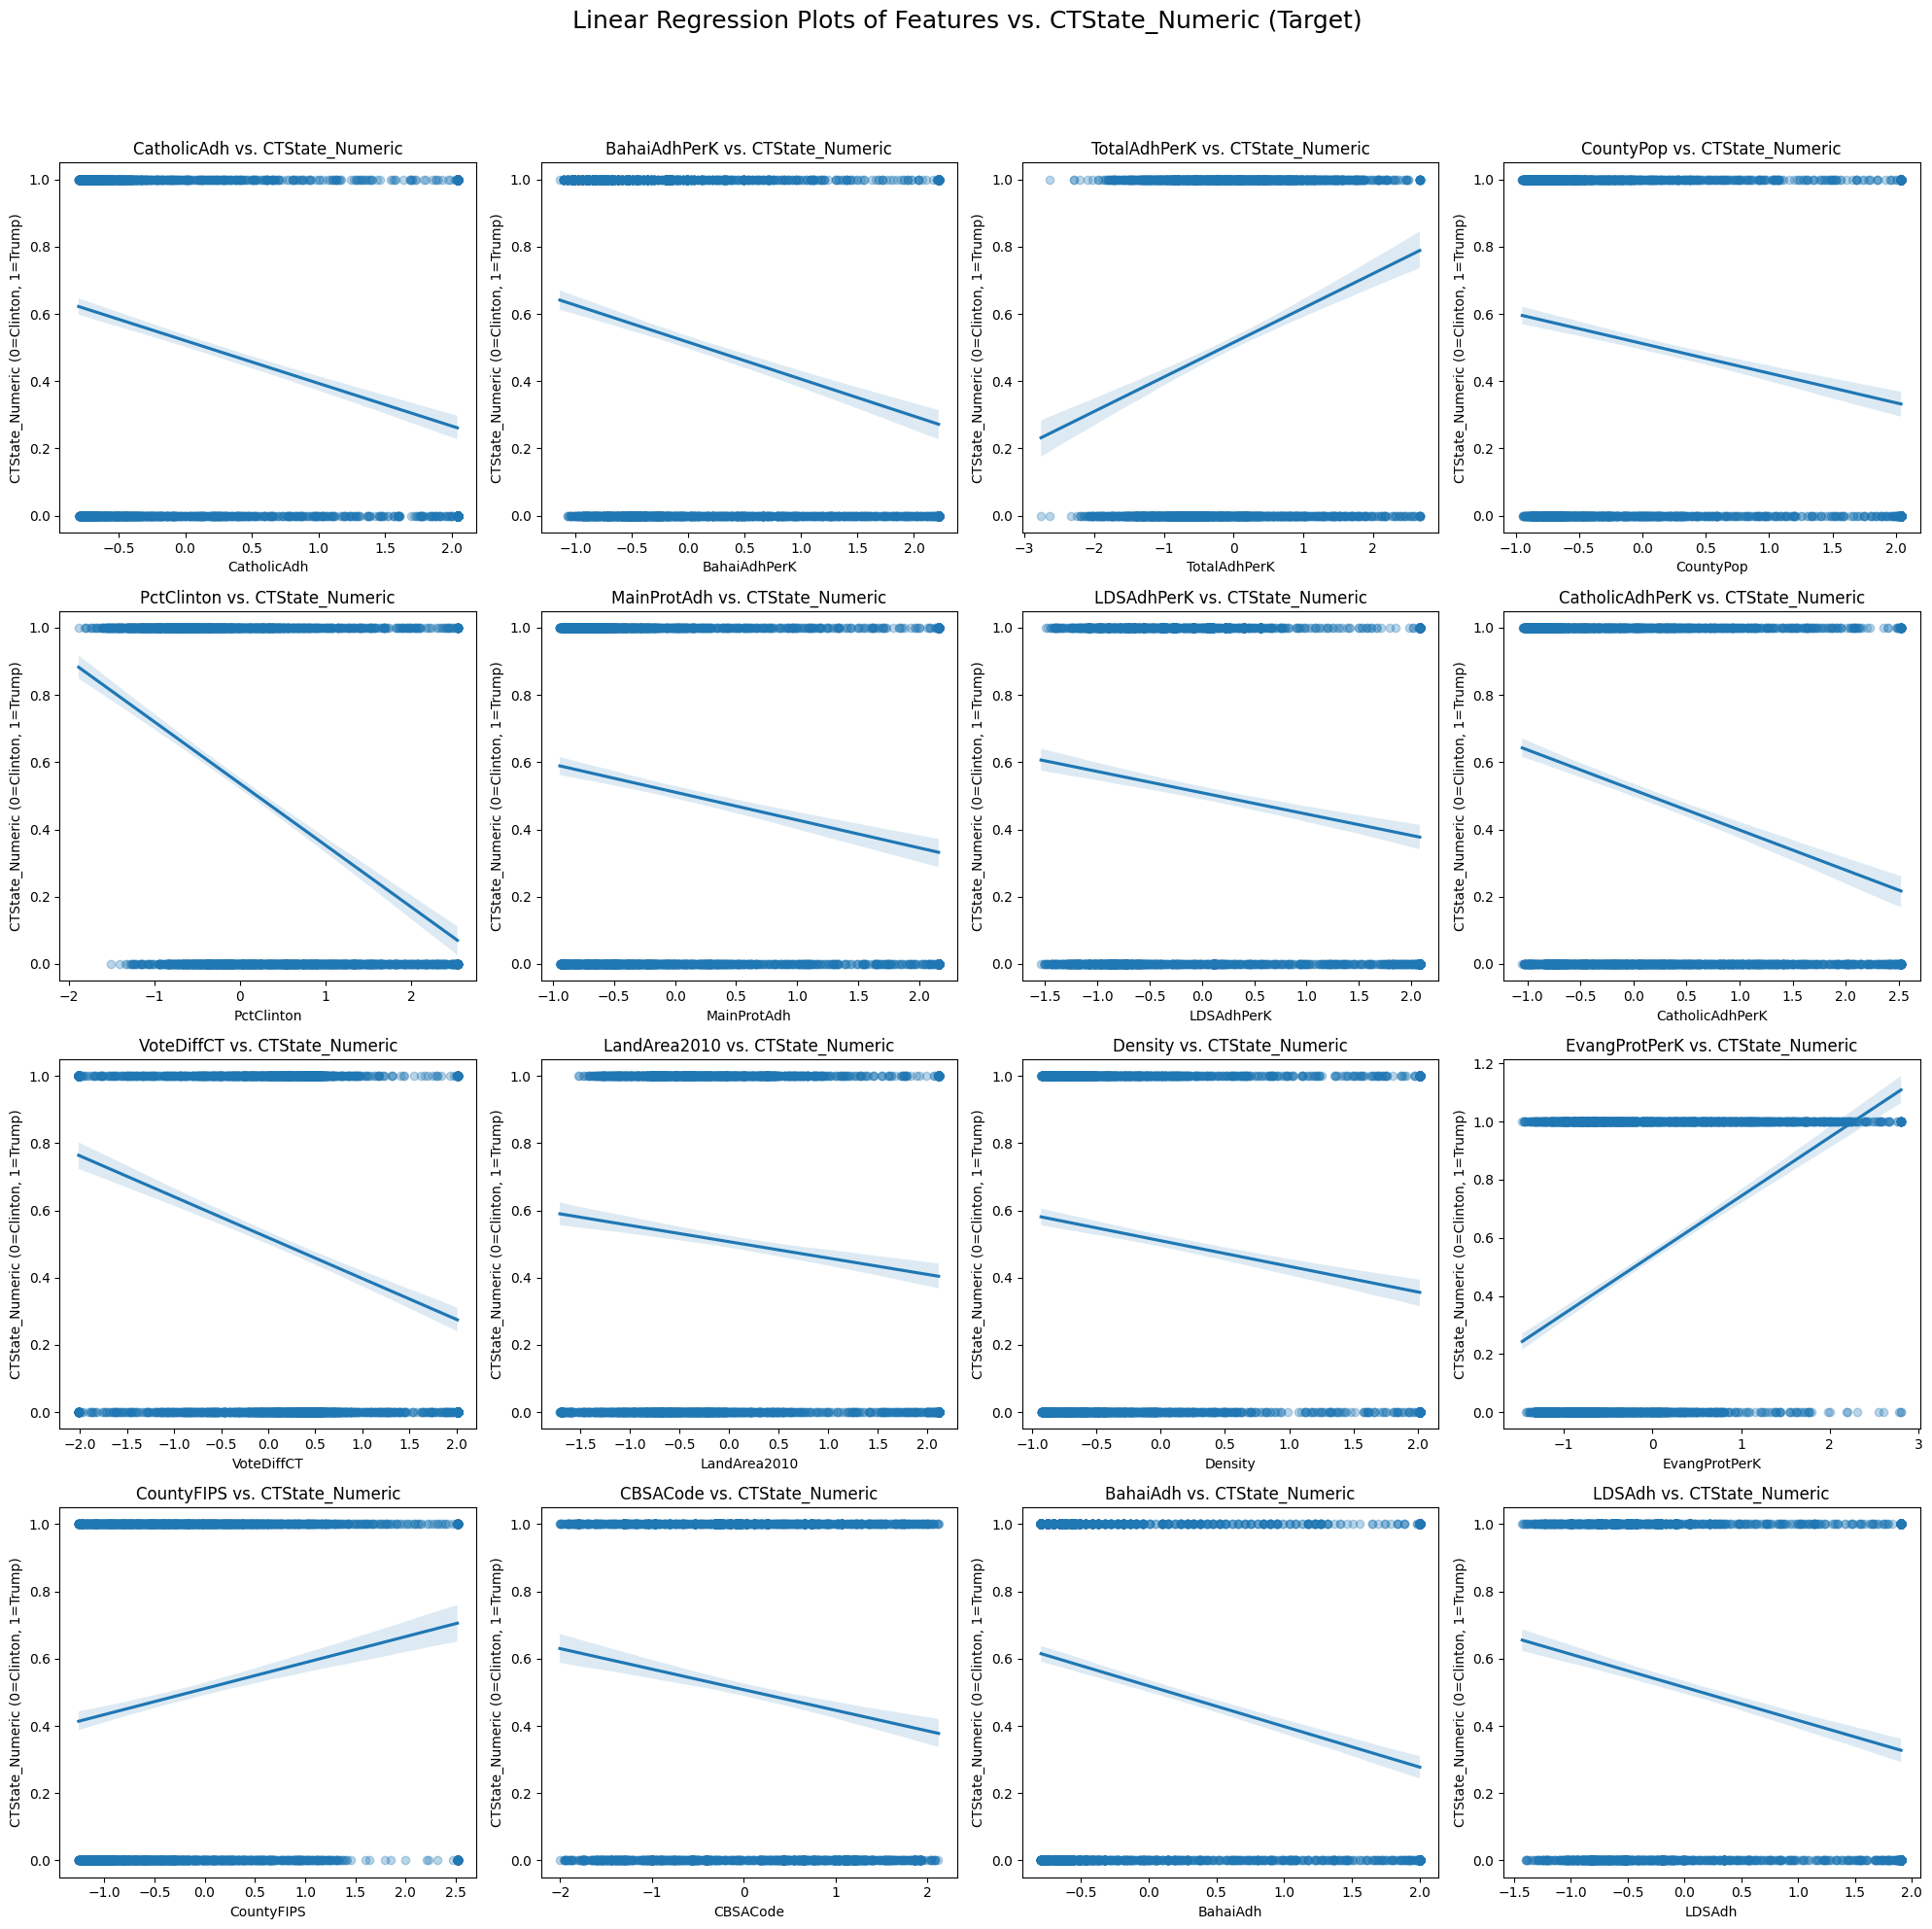

In [368]:
import math

# Get the list of feature columns from df_train_viz, excluding the target and any non-numeric columns if present
features = [col for col in df_train_viz.columns if col != 'CTState_Numeric' and df_train_viz[col].dtype != 'object']

# Determine the grid size for subplots
num_features = len(features)
rows = math.ceil(num_features / 4) # Assuming 4 plots per row
plt.figure(figsize=(20, 5 * rows)) # Adjust figure size dynamically

plt.suptitle('Linear Regression Plots of Features vs. CTState_Numeric (Target)', y=1.02, fontsize=18)

for i, feature in enumerate(features):
    plt.subplot(rows, 4, i + 1)
    sns.regplot(x=df_train_viz[feature], y=df_train_viz['CTState_Numeric'], scatter_kws={'alpha':0.3})
    plt.title(f'{feature} vs. CTState_Numeric')
    plt.xlabel(feature)
    plt.ylabel('CTState_Numeric (0=Clinton, 1=Trump)')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Adjust layout to prevent suptitle overlap
plt.show()

### Step 9: Train a Linear Regression Model

This step involves training a Linear Regression model using the preprocessed training data. After training, the model's performance will be evaluated on the validation set using key metrics such as Mean Squared Error (MSE) and R-squared. This helps in understanding the model's accuracy and predictive power.

In [369]:
# Import LinearRegression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Training Linear Regression model...")

# Initialize the Linear Regression model
linear_model = LinearRegression()

# Train the model using the training data
linear_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")

# Make predictions on the validation set
y_pred_valid = linear_model.predict(X_valid)

# Evaluate the model on the validation set
mse = mean_squared_error(y_valid, y_pred_valid)
r2 = r2_score(y_valid, y_pred_valid)

print(f"\nModel Evaluation on Validation Set:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Display model coefficients
print("\nModel Coefficients:")
coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': linear_model.coef_})
display(coefficients.sort_values(by='Coefficient', ascending=False))

Training Linear Regression model...
Linear Regression model trained successfully.

Model Evaluation on Validation Set:
Mean Squared Error (MSE): 0.2009
R-squared (R2): 0.1956

Model Coefficients:


,Feature,Coefficient
3,CountyPop,0.196345
2,TotalAdhPerK,0.122176
12,CountyFIPS,0.024792
11,EvangProtPerK,0.016015
8,VoteDiffCT,-0.001678
14,BahaiAdh,-0.008691
1,BahaiAdhPerK,-0.015478
15,LDSAdh,-0.016538
9,LandArea2010,-0.016810
0,CatholicAdh,-0.040840
